# Data description :

# Importing libraries :

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df=pd.read_csv("../input/heart-failure-prediction/heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA:

In [4]:
df.isnull().sum()
#check if there is missing data and we found that there is no missing data 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.info()
#we have three types in this data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

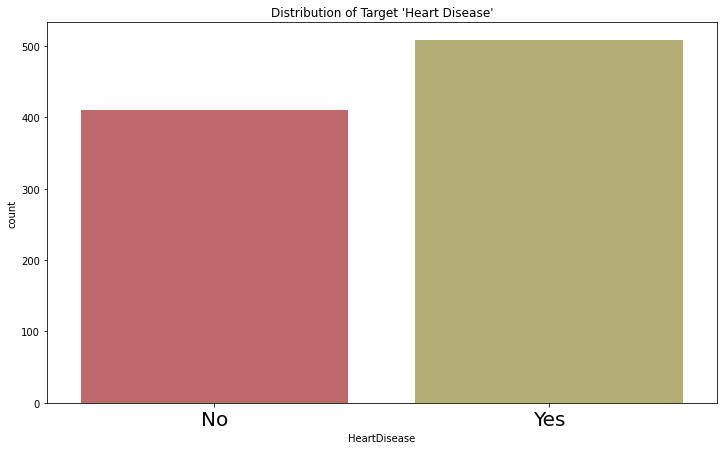

In [6]:
plt.figure(figsize=(12, 7))
heartDisease_countplot = sns.countplot(x=df.HeartDisease,palette=["#CD5C5C","#BDB76B"])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)
#OUR TARGET IS Heart Disease :

Here we notice that there is heartdisease is more than there is not 

Text(0, 0.5, 'Count')

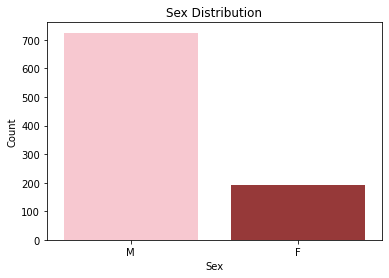

In [7]:
sns.countplot(data=df,x='Sex' , palette=['pink','brown']);
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

Here we notice the who have more heart disease is the males 

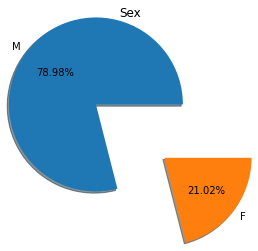

In [8]:
plt.rcParams.update({'font.size': 10})
ax=df['Sex'].value_counts().plot.pie(explode=[0.5,0.5],autopct='%1.2f%%',shadow=True );
ax.set_title(label = "Sex");
plt.axis('off');

Here we find 78.98% of makes have heart disease and 21.02% of females have heart disease and 
males are approximately 3 times more likely to have heart disease than females.

In [9]:
df.ChestPainType.unique() 

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

Here we check the types of chestpain :we have four types of chest pain 
    ATA,NAP,ASY,TA
   

In [10]:
ChestPainType_label = ['ATA', 'NAP', 'ASY', 'TA']
ChestPainType_size = [173, 203, 496, 46]
ChestPainType_explode = (0, 0, 0, 0)

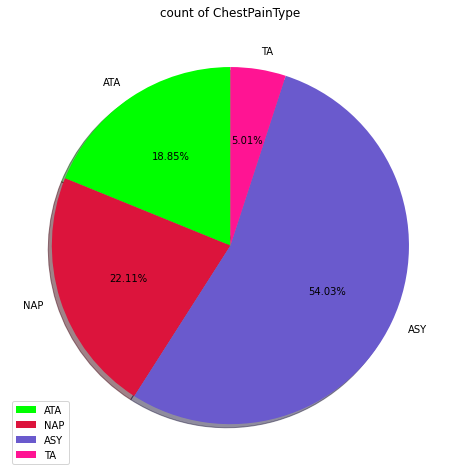

In [11]:
plt.figure(figsize=(8,9))
plt.pie( ChestPainType_size , explode=ChestPainType_explode , labels=ChestPainType_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors= ['lime','crimson', 'slateblue', 'deeppink'])
plt.title("count of ChestPainType")
plt.legend()

 Here we found that ASY is the type who has the highest pre for the pain chest .

Here first we have to know that  RestingECG is :a non-invasive test that can detect abnormalities including arrhythmias,evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks. 

In [12]:
RestingECG_label = ['Normal', 'ST', 'LVH']
RestingECG_size = [552, 178, 188]
RestingECG_explode = (0, 0, 0)

here we have three levels of restingEGG':'Normal', 'ST', 'LVH'

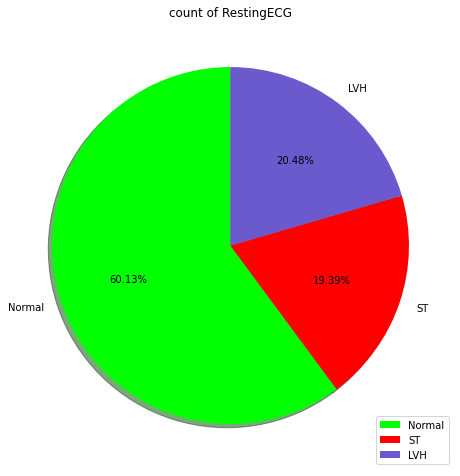

In [13]:
plt.figure(figsize=(8,9))
plt.pie( RestingECG_size , explode=RestingECG_explode , labels=RestingECG_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['lime', 'red', 'slateblue'])
plt.title("count of RestingECG")
plt.legend()

Here we find that the normal have the highest pre 

In [14]:
ExerciseAngina_label = ['yes', 'no']
ExerciseAngina_size = [552, 178]
ExerciseAngina_explode = (0, 0)

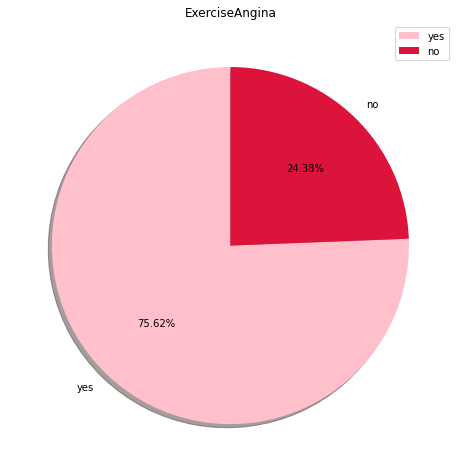

In [15]:
plt.figure(figsize=(8,9))
plt.pie( ExerciseAngina_size , explode=ExerciseAngina_explode , labels=ExerciseAngina_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['pink', 'crimson'])
plt.title("ExerciseAngina")
plt.legend()

Here who had ExerciseAngina is more than whos hadnot and by pre is 75.62%

In [16]:
ST_Slope_label = ['Flat','Up','Down']
ST_Slope_size = [552, 178, 188]
ST_Slope_explode = (0, 0, 0)

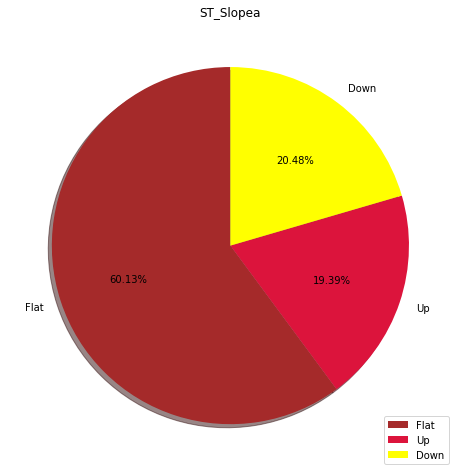

In [17]:
plt.figure(figsize=(8,9))
plt.pie( ST_Slope_size , explode=ST_Slope_explode , labels=ST_Slope_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['brown', 'crimson','yellow'])
plt.title("ST_Slopea")
plt.legend()

In [18]:
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])

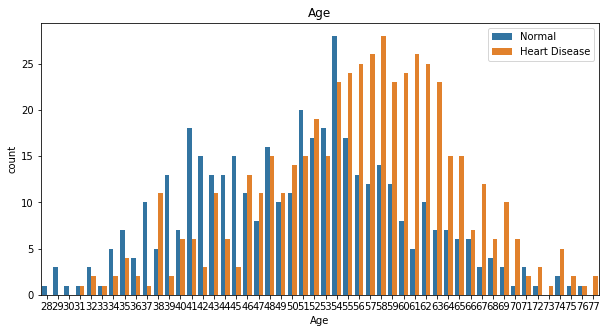

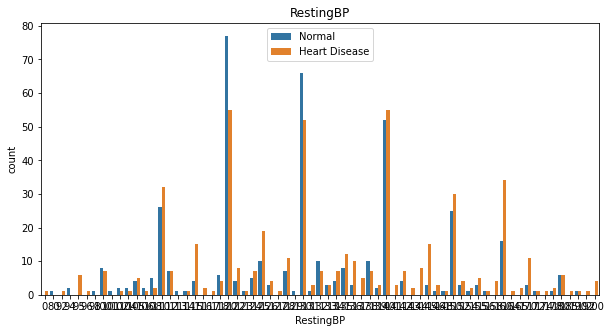

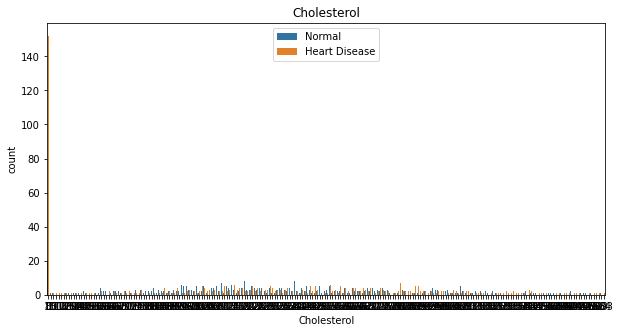

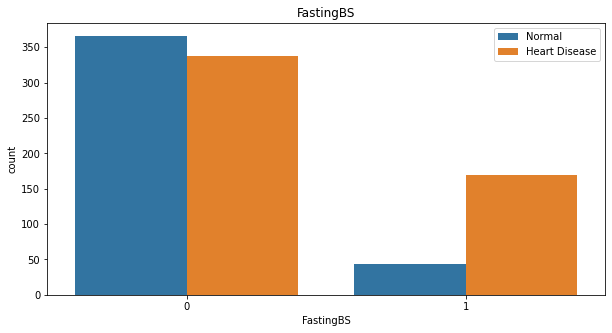

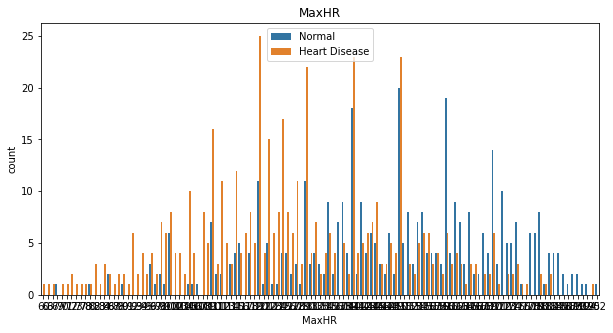

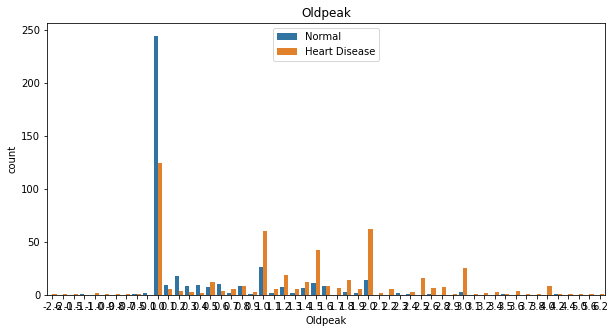

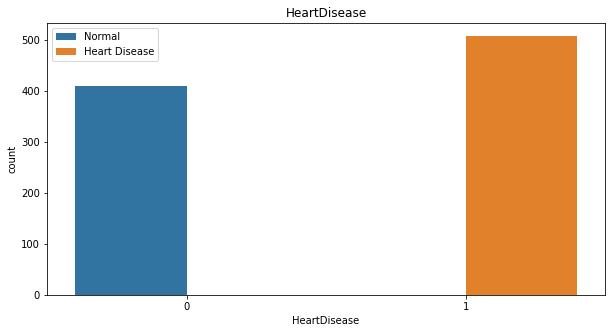

In [19]:
# ploting numerical features with target
#here we compare betwwen our target and our numerical features 
for i in Numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

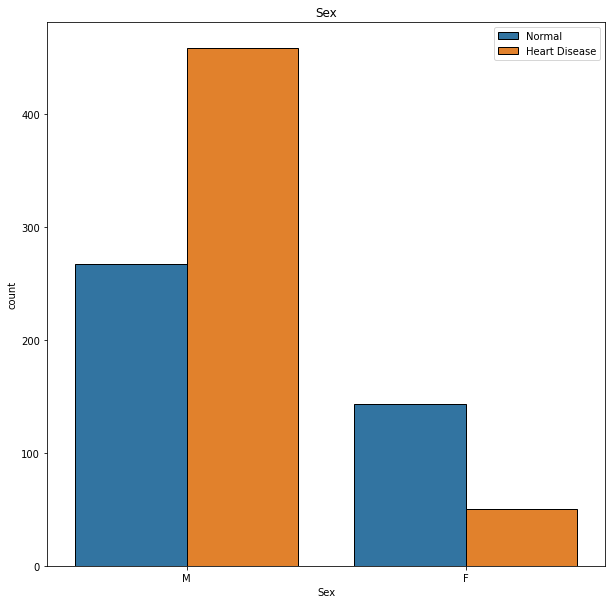

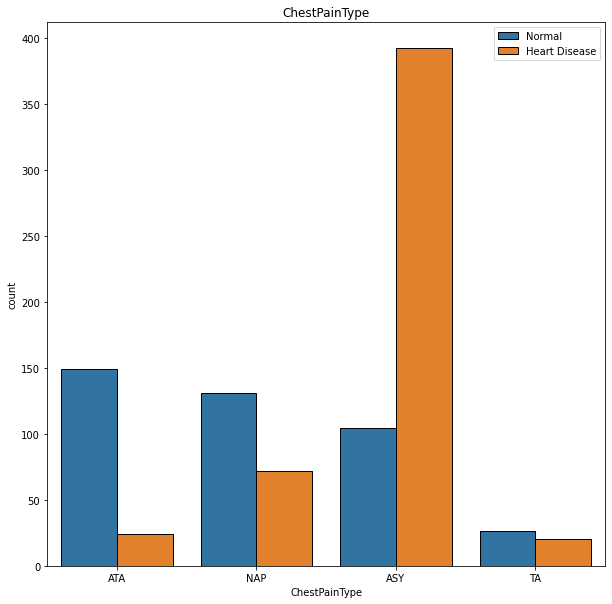

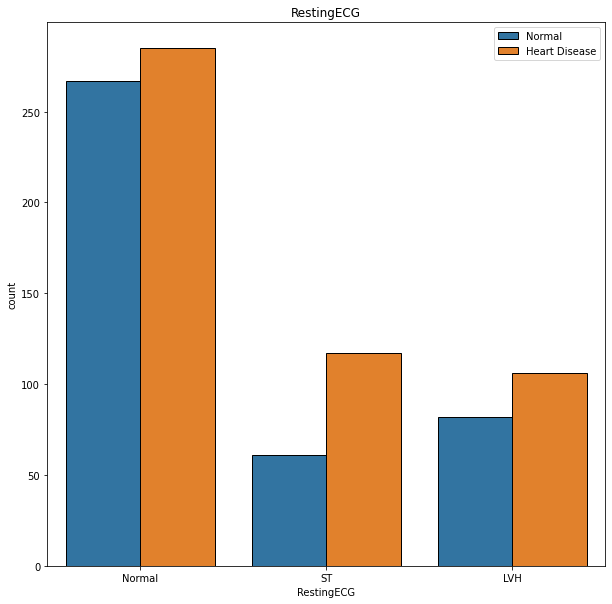

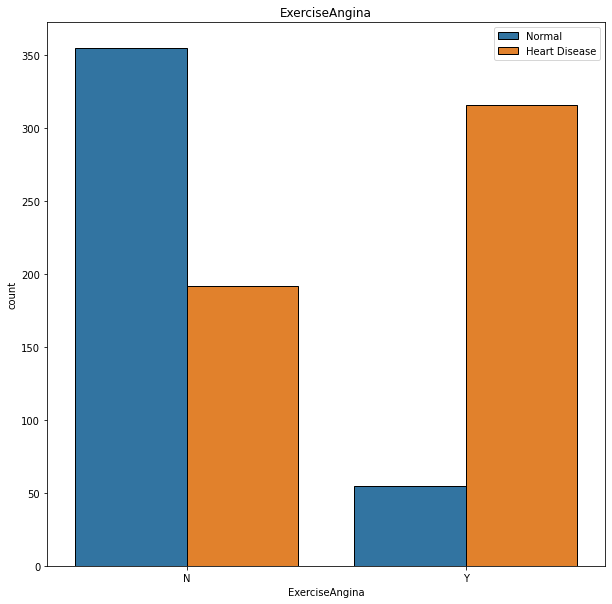

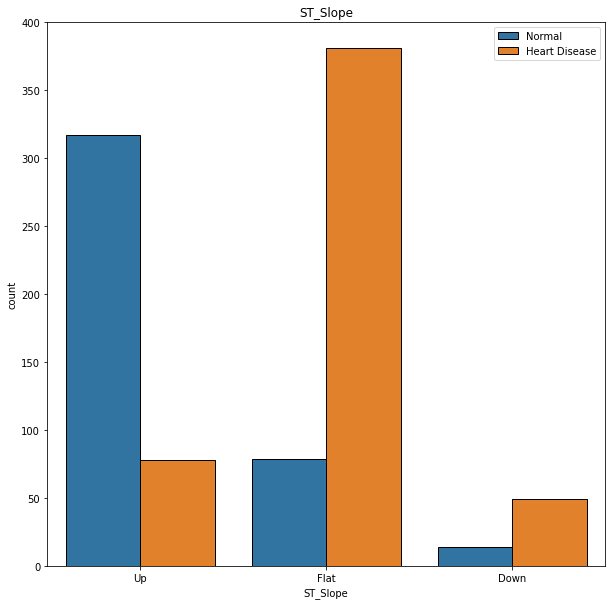

In [20]:
#here we compare betwwen our target and our Categorical features 
for i in Categorical:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, data=df, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

# Handeling with outliers :

<AxesSubplot:>

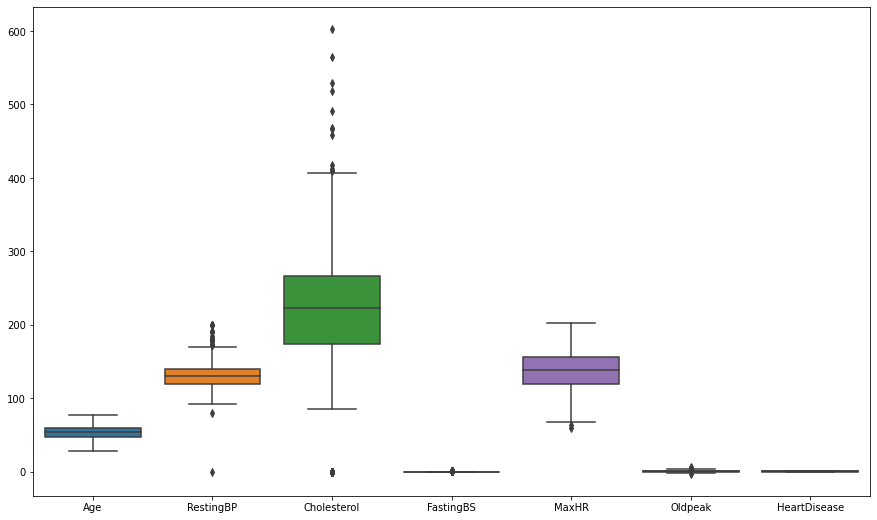

In [21]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df)

after the boxplot we find that the outliers here in (age - restingBP-cholesterol-MaxHR-oldpeak)

so that i decided to make alist of them 

In [22]:
df_num_name = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [23]:
#here we are detecting outliers :

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [24]:
#here we are trying to find the numbers of outliers and max and min of them to can detect them clearly:
outliers = find_outliers_IQR(df['RestingBP'])
print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 28
max outlier value: 200
min outlier value: 0


we find that there are 27 outliers and max ouliers id 200 and the min is 80 

In [25]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check Age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check RestingBP outliers 
number of outliers: 28
max outlier value: 200
min outlier value: 0

-Check Cholesterol outliers 
number of outliers: 183
max outlier value: 603
min outlier value: 0

-Check MaxHR outliers 
number of outliers: 2
max outlier value: 63
min outlier value: 60

-Check Oldpeak outliers 
number of outliers: 16
max outlier value: 6.2
min outlier value: -2.6



In [26]:
print(f" original shape of Cholesterol : {df.Cholesterol.shape}")

ziro_Cholesterol = df[df['Cholesterol'] == 0]
print(f" zero values of Cholesterol : {ziro_Cholesterol.shape}")

non_ziro_Cholesterol = df[df['Cholesterol'] != 0]
print(f" non zero values of Cholesterol : {non_ziro_Cholesterol.shape}")

 original shape of Cholesterol : (918,)
 zero values of Cholesterol : (172, 12)
 non zero values of Cholesterol : (746, 12)


In [27]:
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [28]:
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df["Cholesterol"]

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [29]:
ziro_RestingBP = df[df['RestingBP'] == 0]
ziro_RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,237.0,0,Normal,155,N,1.5,Flat,1


In [30]:
df = df.drop(df[(df['RestingBP'] == 0)].index) 
#after this we decide to drop this columns 

In [31]:
normal_RestingBP = df[df['RestingBP'] <= 120 ]
PreHyper_RestingBP = df[(df['RestingBP'] > 120) & (df['RestingBP']<= 139) ]
High1_RestingBP = df[(df['RestingBP'] >= 140) & (df['RestingBP']<= 159) ]
High2_RestingBP = df[(df['RestingBP'] >= 160) & (df['RestingBP']<= 180) ]
HyperTensive_RestingBP = df[df['RestingBP'] >= 180]
#here we detect the restingbp

# Encoding categorical features:

In [32]:
from sklearn.preprocessing import LabelEncoder


In [33]:
ChestPainType_le = LabelEncoder()
RestingECG_le = LabelEncoder()
ExerciseAngina_le = LabelEncoder()
ST_Slope_le = LabelEncoder()
Sex_le = LabelEncoder()


In [34]:
df['ChestPainType'] = ChestPainType_le.fit_transform(df['ChestPainType'])

In [35]:
ChestPainType_le.classes_

array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)

In [36]:
df['RestingECG'] = RestingECG_le.fit_transform(df['RestingECG'])


In [37]:
RestingECG_le.classes_

array(['LVH', 'Normal', 'ST'], dtype=object)

In [38]:
df['ST_Slope'] = ST_Slope_le.fit_transform(df['ExerciseAngina'])

In [39]:
ST_Slope_le.classes_

array(['N', 'Y'], dtype=object)

In [40]:
df['ExerciseAngina'] = ExerciseAngina_le.fit_transform(df['ExerciseAngina'])

In [41]:
ExerciseAngina_le.classes_

array(['N', 'Y'], dtype=object)

In [42]:
df['Sex'] = Sex_le.fit_transform(df['Sex'])

In [43]:
Sex_le.classes_

array(['F', 'M'], dtype=object)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int64  
 2   ChestPainType   917 non-null    int64  
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    int64  
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    int64  
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    int64  
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 93.1 KB


# Split and test the data:

In [45]:
x = df.drop('HeartDisease', axis=1)
y = df.HeartDisease
#here we seprate the target 

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [47]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=x.columns)
X_test = pd.DataFrame(X_test_std, columns=x.columns)

In [48]:
display(X_train.head())
display(X_test.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.052026,0.516309,1.276887,0.970493,-0.902823,-0.551733,0.017264,-0.581047,-0.824310,-0.831502,-0.824310
1,0.052026,-1.936826,0.230501,0.414627,1.231972,-0.551733,1.600366,0.126132,-0.824310,-0.831502,-0.824310
2,0.158042,0.516309,-0.815884,-0.030066,2.055929,-0.551733,0.017264,-0.188170,1.213136,0.293802,1.213136
3,-1.114157,-1.936826,1.276887,0.970493,0.202027,-0.551733,0.017264,1.501203,-0.824310,-0.831502,-0.824310
4,-0.372041,0.516309,-0.815884,0.414627,-0.228677,-0.551733,1.600366,0.126132,1.213136,3.857266,1.213136


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.370075,-1.936826,2.323272,-0.141240,1.213246,-0.551733,0.017264,-1.523953,-0.824310,0.106251,-0.824310
1,-1.114157,0.516309,-0.815884,-0.697106,-1.277348,-0.551733,0.017264,-0.659623,1.213136,0.106251,1.213136
2,-1.432206,0.516309,-0.815884,-0.697106,4.171998,1.812470,0.017264,0.597585,1.213136,0.106251,1.213136
3,-1.114157,0.516309,-0.815884,-0.697106,-1.239896,-0.551733,-1.565838,-0.659623,1.213136,1.512882,1.213136
4,0.476092,0.516309,0.230501,-0.363586,-0.116319,1.812470,0.017264,-1.052500,1.213136,1.044005,1.213136


# Modeling by different methods  :

# Logistic Regression :


In [49]:
lr = LogisticRegression(C = 80)

In [50]:
lr.fit(X_train , y_train)

LogisticRegression(C=80)

In [51]:
lr.score(X_train , y_train)

0.8240109140518418

In [52]:
lr.score(X_test , y_test)

0.8315217391304348

In [53]:
lr.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0])

In [54]:
Y_pred = lr.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
199,0,0
44,1,1
103,1,1
852,1,1
480,1,1
665,1,1
146,0,0
128,0,0
260,0,0
811,0,0


# KNN:

In [55]:
from sklearn.neighbors import KNeighborsClassifier


In [56]:
knn = KNeighborsClassifier(n_neighbors=10)

In [57]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=10)

In [58]:
knn.score(X_train , y_train)

0.8281036834924966

In [59]:
knn.score(X_test , y_test)

0.7989130434782609

# Decision Tree:


In [60]:
dt =DecisionTreeClassifier(max_features=9 ,    max_depth=4)

In [61]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4, max_features=9)

In [62]:
dt.score(X_train , y_train)

0.8281036834924966

In [63]:
dt.score(X_test , y_test)


0.8206521739130435

[Text(0.49107142857142855, 0.9, 'X[2] <= -0.293\ngini = 0.496\nsamples = 733\nvalue = [334, 399]'),
 Text(0.26785714285714285, 0.7, 'X[9] <= -0.222\ngini = 0.35\nsamples = 394\nvalue = [89, 305]'),
 Text(0.14285714285714285, 0.5, 'X[5] <= 0.63\ngini = 0.486\nsamples = 156\nvalue = [65, 91]'),
 Text(0.07142857142857142, 0.3, 'X[10] <= 0.194\ngini = 0.5\nsamples = 119\nvalue = [60, 59]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.469\nsamples = 80\nvalue = [50, 30]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.381\nsamples = 39\nvalue = [10, 29]'),
 Text(0.21428571428571427, 0.3, 'X[3] <= -0.086\ngini = 0.234\nsamples = 37\nvalue = [5, 32]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.25, 0.1, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.39285714285714285, 0.5, 'X[4] <= 3.563\ngini = 0.181\nsamples = 238\nvalue = [24, 214]'),
 Text(0.35714285714285715, 0.3, 'X[3] <= -2.587\ngini = 0.175\nsamples = 237\nvalue = [23, 214]'),
 Text(0.321

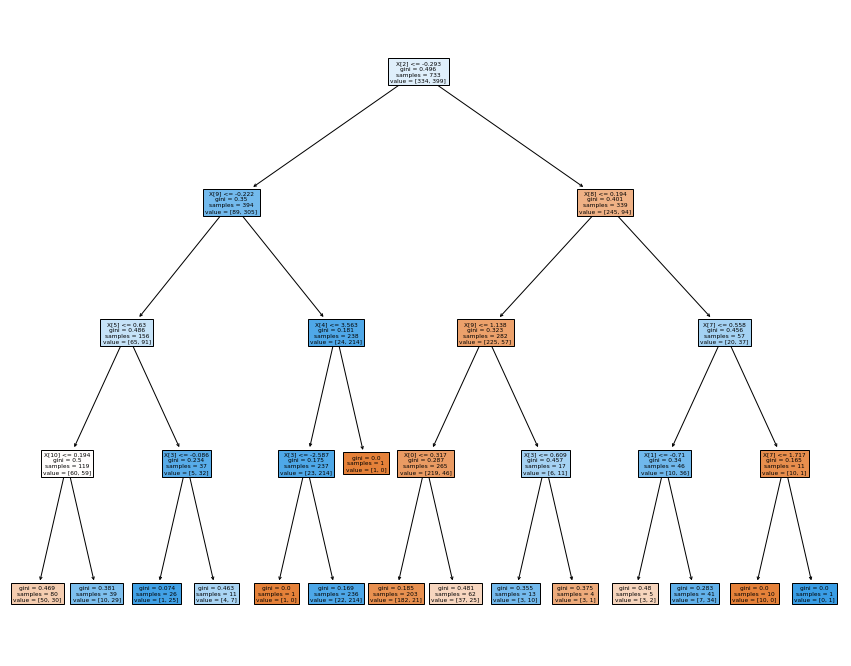

In [64]:
from sklearn import tree
fig = plt.figure(figsize = (15,12))
tree.plot_tree(dt , filled= True)

In [65]:
Y_pred = dt.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
199,0,0
44,1,1
103,1,0
852,1,1
480,1,1
665,1,1
146,0,0
128,0,0
260,0,0
811,0,1


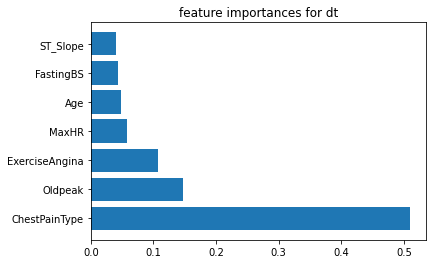

In [66]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for dt')
    plt.show()

# whatever your features are called
features_names = list(df.columns)
    
#dt= DecisionTreeClassifier (max_depth=7, max_features=6)
#df.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(dt.feature_importances_), features_names, top=7)

In [67]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.8281
Test set score: 0.8207


In [68]:
#Classification Report#:it seems it is very good 
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        76
           1       0.87      0.81      0.84       108

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



In [69]:
#Here, the training-set accuracy score is0.8226 while the test-set accuracy to be 0.8207 
#These two values are quite comparable.
#So, there is no sign of overfitting

# Random Forest:

In [70]:
rf = RandomForestClassifier(max_features=7 ,    max_depth=3)

In [71]:
rf.fit(X_train , y_train)
rf.score(X_train , y_train)

0.8362892223738063

In [72]:
rf.score(X_test , y_test)

0.8206521739130435

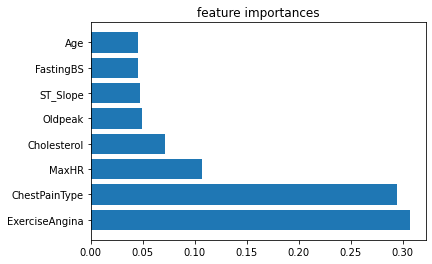

In [73]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = list(df.columns)
    
rf =RandomForestClassifier(n_estimators=4 , max_depth=3 , min_samples_split=25 , max_features=4)
rf.fit(X_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=8)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
Accuracy, Precision, Recall, F1= {}, {}, {}, {}
models = {}
models['Logistic Regression'] = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=6, algorithm='kd_tree', metric='manhattan')
models['Decision Trees'] = DecisionTreeClassifier(criterion='gini', max_depth=4)
models['Random Forest'] = RandomForestClassifier(n_estimators = 85, min_samples_split= 8, min_samples_leaf= 3, max_features= 'auto',
                                      max_depth= 50, bootstrap= True, random_state=125)

In [75]:
for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    Accuracy[key] = accuracy_score(predictions, y_test)
    Precision[key] = precision_score(predictions, y_test)
    Recall[key] = recall_score(predictions, y_test)
    F1[key] = f1_score(predictions, y_test)

In [76]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = Accuracy.values()
df_model['Precision'] = Precision.values()
df_model['Recall'] = Recall.values()
df_model['F1 Score'] = F1.values()
df_model.sort_values

<bound method DataFrame.sort_values of                      Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.831522   0.833333  0.873786  0.853081
K-Nearest Neighbor   0.820652   0.824074  0.864078  0.843602
Decision Trees       0.798913   0.833333  0.825688  0.829493
Random Forest        0.788043   0.824074  0.816514  0.820276>

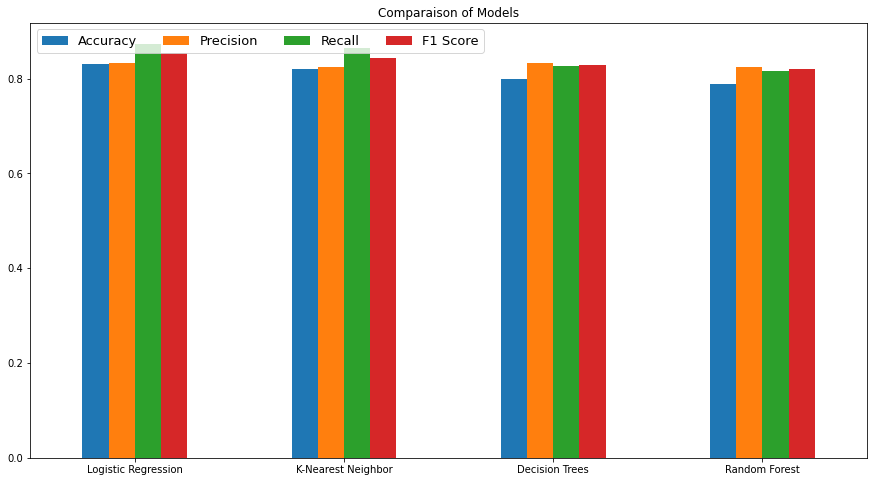

In [77]:
plt.rcParams["figure.figsize"] = (15,8)
ax = df_model.sort_values(by='Accuracy',ascending=False).plot.bar(rot=0)
ax.title.set_text('Comparaison of Models')
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='upper left',prop={'size': 13})


In [78]:
#after this comparesion we find that the logistic regression has the highest acc 

# XGBoost Model :

In [79]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install --upgrade xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.1
    Uninstalling xgboost-1.6.1:
      Successfully uninstalled xgboost-1.6.1
Note: you may need to restart the kernel to use updated packages.


In [81]:
from xgboost import XGBClassifier

In [82]:
xgb = XGBClassifier(max_depth = 7 , learning_rate = 0.25 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [83]:
xgb.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [84]:
xgb.score(X_train , y_train)

0.9167803547066848

In [85]:
xgb.score(X_test , y_test)

0.7989130434782609

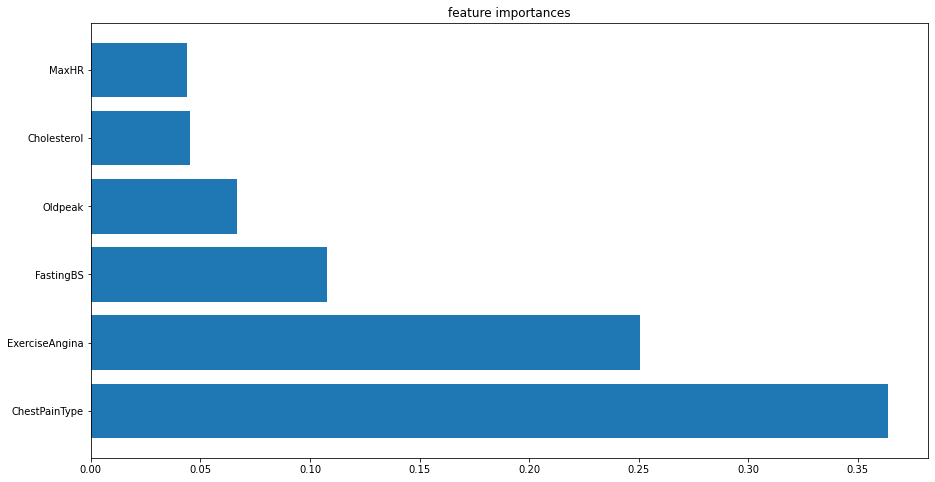

In [86]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = list(df.columns)



# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(xgb.feature_importances_), features_names, top=6)


# Adaboost :

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
ada = AdaBoostClassifier(n_estimators=3, learning_rate=0.2)

In [89]:
ada.fit(X_train , y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=3)

In [90]:
ada.score(X_train , y_train )

0.7748976807639836

In [91]:
ada.score(X_test , y_test)

0.7717391304347826

# Voting :

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [93]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors=4)
clf3 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
clf4 = RandomForestClassifier(n_estimators=3 , max_depth=6  , max_features=4)


In [94]:
v_clf = VotingClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                     ("XGBClassifier" , clf3) ,("RandomForestClassifier" , clf4)] , voting = "hard")

In [95]:
v_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=4)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma...
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=No

In [96]:
v_clf.score(X_train , y_train)

0.8676671214188267

In [97]:
v_clf.score(X_test , y_test)

0.842391304347826

# Light GBM :

In [98]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [99]:
from sklearn.metrics import roc_auc_score


In [100]:
from lightgbm import LGBMClassifier

In [101]:
lgbm_clf = LGBMClassifier(n_estimators=500)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=500, eval_metric="auc", eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.88231	valid_0's binary_logloss: 0.636188
[2]	valid_0's auc: 0.869578	valid_0's binary_logloss: 0.603904
[3]	valid_0's auc: 0.884016	valid_0's binary_logloss: 0.571924
[4]	valid_0's auc: 0.885112	valid_0's binary_logloss: 0.548769
[5]	valid_0's auc: 0.89961	valid_0's binary_logloss: 0.523775
[6]	valid_0's auc: 0.90491	valid_0's binary_logloss: 0.505397
[7]	valid_0's auc: 0.904179	valid_0's binary_logloss: 0.488112
[8]	valid_0's auc: 0.908199	valid_0's binary_logloss: 0.47033
[9]	valid_0's auc: 0.906555	valid_0's binary_logloss: 0.4588
[10]	valid_0's auc: 0.907895	valid_0's binary_logloss: 0.448635
[11]	valid_0's auc: 0.909174	valid_0's binary_logloss: 0.438845
[12]	valid_0's auc: 0.9096	valid_0's binary_logloss: 0.430783
[13]	valid_0's auc: 0.912281	valid_0's binary_logloss: 0.421201
[14]	valid_0's auc: 0.912281	valid_0's binary_logloss: 0.415539
[15]	valid_0's auc: 0.911306	valid_0's binary_logloss: 0.412213
[16]	valid_0's auc: 0.912037	valid_0's binary_logloss: 0.

In [102]:
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.9174


# CatBOOST:

In [103]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [104]:
# model building catboost
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(iterations=107)
model2.fit(X_train, y_train)


Learning rate set to 0.070047
0:	learn: 0.6694277	total: 54.1ms	remaining: 5.73s
1:	learn: 0.6512225	total: 54.9ms	remaining: 2.88s
2:	learn: 0.6305240	total: 55.7ms	remaining: 1.93s
3:	learn: 0.6130591	total: 56.5ms	remaining: 1.46s
4:	learn: 0.5994500	total: 57.3ms	remaining: 1.17s
5:	learn: 0.5855302	total: 58.2ms	remaining: 979ms
6:	learn: 0.5730551	total: 58.9ms	remaining: 841ms
7:	learn: 0.5593636	total: 59.6ms	remaining: 738ms
8:	learn: 0.5487239	total: 60.4ms	remaining: 657ms
9:	learn: 0.5377056	total: 61.2ms	remaining: 593ms
10:	learn: 0.5281364	total: 61.9ms	remaining: 540ms
11:	learn: 0.5197308	total: 62.6ms	remaining: 495ms
12:	learn: 0.5103584	total: 63.1ms	remaining: 456ms
13:	learn: 0.5019622	total: 63.8ms	remaining: 424ms
14:	learn: 0.4945458	total: 64.4ms	remaining: 395ms
15:	learn: 0.4867965	total: 65.1ms	remaining: 370ms
16:	learn: 0.4814426	total: 65.7ms	remaining: 348ms
17:	learn: 0.4753944	total: 66.4ms	remaining: 328ms
18:	learn: 0.4703347	total: 67ms	remaining: 

In [105]:
# predict
y_pred = model2.predict(X_test)


In [106]:
# Print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8097826086956522


In [107]:
# print classification report
from sklearn.metrics import classification_report
print('Classification report\n',classification_report(y_test, y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.77      0.78      0.77        76
           1       0.84      0.83      0.84       108

    accuracy                           0.81       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184



# XGBM :

In [108]:
import xgboost as Xgb

In [109]:
xgb = Xgb.XGBClassifier()

In [110]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [111]:
xgb.score(X_train, y_train)

1.0

In [112]:
y_pred_xgb = xgb.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_xgb, y_test) * 100, 2)

In [114]:
print("Training Accuracy     :",xgb_train,"%")
print("Model Accuracy Score  :",xgb_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 83.15 %
Confusion Matrix: 
 [[59 17]
 [14 94]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        76
           1       0.85      0.87      0.86       108

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



# Conclusion:

According to the compared algorithms,  XGBoost Model Algorithm gives the best result in terms of accuracy. 
When examined in general,
the algorithms give results that are close to each other.
Achieved 91% accuracy with  XGBoost Model :